In [2]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential  #모델a 만들기
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, LSTM , BatchNormalization, Activation #레이어 쌓기
from tensorflow.keras.optimizers import SGD, RMSprop, Adam
from tensorflow.keras.losses import sparse_categorical_crossentropy, categorical_crossentropy, binary_crossentropy, mean_squared_error
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.models import load_model, Model
from keras.utils.np_utils import to_categorical #일종의 원핫인코딩. 정답에 대한 내용들을 숫자로 바꾸겠다.

In [3]:
(X_data, y_data), (tt_x, tt_y) = keras.datasets.cifar100.load_data()

169017344/169001437 [==============================] - 3s 0us/step


In [4]:
X_data.shape, y_data.shape, tt_x.shape, tt_y.shape

((50000, 32, 32, 3), (50000, 1), (10000, 32, 32, 3), (10000, 1))

In [4]:
np.unique(tt_y)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])

In [5]:
s_x_data = (X_data)/255.0
s_tt_x = (tt_x) / 255.0

In [6]:
s_x_data.shape, s_tt_x.shape

((50000, 32, 32, 3), (10000, 32, 32, 3))

In [6]:
c_y_data = to_categorical(y_data)
c_tt_y = to_categorical(tt_y)

In [7]:
X,_,Y,_ = train_test_split(s_x_data, c_y_data, test_size=0.7, stratify=c_y_data)

In [9]:
X.shape, Y.shape

((15000, 32, 32, 3), (15000, 100))

In [8]:
X = s_x_data
Y = c_y_data

In [1]:
del m

NameError: ignored

In [9]:
m = Sequential()
m.add(Conv2D(64,kernel_size = (5,5),padding='same',input_shape=(32,32,3)))
m.add(BatchNormalization())
m.add(Activation('relu'))
m.add(Conv2D(64,kernel_size = (5,5),padding='same'))
m.add(BatchNormalization())
m.add(Activation('relu'))
m.add(MaxPooling2D(2))
m.add(Dropout(0.3))
m.add(Conv2D(128,kernel_size = (5,5),padding='same'))
m.add(BatchNormalization())
m.add(Activation('relu'))
m.add(Conv2D(128,kernel_size = (5,5),padding='same'))
m.add(BatchNormalization())
m.add(Activation('relu'))
m.add(MaxPooling2D(2))
m.add(Dropout(0.3))
m.add(Conv2D(256,kernel_size = (5,5),padding='same'))
m.add(BatchNormalization())
m.add(Activation('relu'))
m.add(Conv2D(256,kernel_size = (5,5),padding='same'))
m.add(BatchNormalization())
m.add(Activation('relu'))
m.add(Conv2D(256,kernel_size = (5,5),padding='same'))
m.add(BatchNormalization())
m.add(Activation('relu'))
m.add(MaxPooling2D(2))
m.add(Dropout(0.3))
m.add(Conv2D(512,kernel_size = (5,5),padding='same',activation='relu'))
m.add(MaxPooling2D(2))
m.add(Flatten())
m.add(Dense(100,activation='softmax'))
adam = Adam(learning_rate = 0.001)
m.compile(optimizer = adam, loss = 'categorical_crossentropy', metrics = 'accuracy')
m.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 64)        4864      
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 64)       256       
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 32, 32, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 64)        102464    
                                                                 
 batch_normalization_1 (Batc  (None, 32, 32, 64)       256       
 hNormalization)                                                 
                                                                 
 activation_1 (Activation)   (None, 32, 32, 64)        0

In [57]:
del hy

In [ ]:
ckp 

In [10]:
hy = m.fit(X,Y,validation_split=0.2,epochs=100, batch_size=16)

Epoch 1/100
2500/2500 [==============================] - 75s 25ms/step - loss: 4.3423 - accuracy: 0.0322 - val_loss: 4.1882 - val_accuracy: 0.0411
Epoch 2/100
2500/2500 [==============================] - 62s 25ms/step - loss: 4.0290 - accuracy: 0.0600 - val_loss: 3.9963 - val_accuracy: 0.0698
Epoch 3/100
1523/2500 [=================>............] - ETA: 22s - loss: 3.8674 - accuracy: 0.0860

KeyboardInterrupt: ignored

In [12]:
hy.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

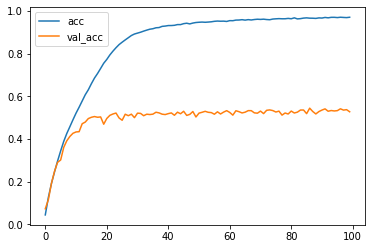

In [59]:
plt.plot(hy.history['accuracy'])
plt.plot(hy.history['val_accuracy'])
plt.legend(['acc','val_acc'])
plt.show()

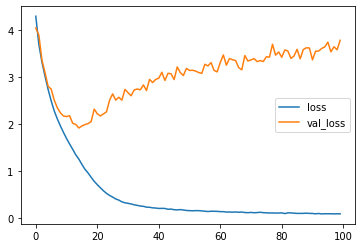

In [60]:
plt.plot(hy.history['loss'])
plt.plot(hy.history['val_loss'])
plt.legend(['loss','val_loss'])
plt.show()